In [1]:
from google.colab import files
uploaded = files.upload()

Saving HIV_AIDS prevalence estimates table.csv to HIV_AIDS prevalence estimates table.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
HA = pd.read_csv("HIV_AIDS prevalence estimates table.csv", encoding='latin-1')

In [7]:
HA.head()

,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
0,ÿEswatini,28.30%,"240,000","3,000",2024
1,ÿLesotho,26.20%,"445,000","7,000",2025
2,ÿBotswana,22.80%,"399,100","5,275",2025
3,ÿZimbabwe,22.10%,"1,660,000","25,600",2024
4,ÿSouth Africa,14.40%,"9,400,000","80,000",2025


In [6]:
HA.tail

<bound method NDFrame.tail of                       Country/Region Adult prevalence of HIV/AIDS  \
0                          ÿEswatini                       28.30%   
1                           ÿLesotho                       26.20%   
2                          ÿBotswana                       22.80%   
3                          ÿZimbabwe                       22.10%   
4                      ÿSouth Africa                       14.40%   
..                               ...                          ...   
188                         ÿAndorra                            -   
189  ÿFederated States of Micronesia                            -   
190                          ÿJordan                            -   
191                      ÿLuxembourg                            -   
192                        ÿMaldives                            -   

    Number of people with HIV/AIDS Annual deaths from HIV/AIDS  \
0                          240,000                       3,000   
1                          445,000                       7,000   
2                          399,100                       5,275   
3                        1,660,000                      25,600   
4                        9,400,000                      80,000   
..                             ...                         ...   
188                            600                           -   
189                            149                           -   
190                          2,000                           -   
191                          5,700                           -   
192                            660                           -   

    Year of estimate  
0               2024  
1               2025  
2               2025  
3               2024  
4               2025  
..               ...  
188             2025  
189             2025  
190             2025  
191             2025  
192             2025  

[193 rows x 5 columns]>

In [8]:
HA.describe()

,Country/Region,Adult prevalence of HIV/AIDS,Number of people with HIV/AIDS,Annual deaths from HIV/AIDS,Year of estimate
count,193,193,192,193,193
unique,193,73,168,56,16
top,ÿEswatini,-,"11,000",-,2024
freq,1,53,6,126,57


In [9]:
HA.value_counts

<bound method DataFrame.value_counts of                       Country/Region Adult prevalence of HIV/AIDS  \
0                          ÿEswatini                       28.30%   
1                           ÿLesotho                       26.20%   
2                          ÿBotswana                       22.80%   
3                          ÿZimbabwe                       22.10%   
4                      ÿSouth Africa                       14.40%   
..                               ...                          ...   
188                         ÿAndorra                            -   
189  ÿFederated States of Micronesia                            -   
190                          ÿJordan                            -   
191                      ÿLuxembourg                            -   
192                        ÿMaldives                            -   

    Number of people with HIV/AIDS Annual deaths from HIV/AIDS  \
0                          240,000                       3,000   
1                          445,000                       7,000   
2                          399,100                       5,275   
3                        1,660,000                      25,600   
4                        9,400,000                      80,000   
..                             ...                         ...   
188                            600                           -   
189                            149                           -   
190                          2,000                           -   
191                          5,700                           -   
192                            660                           -   

    Year of estimate  
0               2024  
1               2025  
2               2025  
3               2024  
4               2025  
..               ...  
188             2025  
189             2025  
190             2025  
191             2025  
192             2025  

[193 rows x 5 columns]>

In [10]:
HA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Country/Region                  193 non-null    object
 1   Adult prevalence of HIV/AIDS    193 non-null    object
 2   Number of people with HIV/AIDS  192 non-null    object
 3   Annual deaths from HIV/AIDS     193 non-null    object
 4   Year of estimate                193 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


In [12]:
HA.columns

Index(['Country/Region', 'Adult prevalence of HIV/AIDS',
       'Number of people with HIV/AIDS', 'Annual deaths from HIV/AIDS',
       'Year of estimate'],
      dtype='object')

In [13]:
HA.isnull().sum()

,0
Country/Region,0
Adult prevalence of HIV/AIDS,0
Number of people with HIV/AIDS,1
Annual deaths from HIV/AIDS,0
Year of estimate,0


In [14]:
HA.shape

(193, 5)

== EDA ==


In [25]:
numeric_HA = HA.select_dtypes(include=['number', 'datetime'])

# Check if there are any numeric columns
if not numeric_HA.empty:
    numeric_HA.hist(bins=50, figsize=(20, 15))
    plt.show()
else:
    print("No numeric or datetime columns found for histogram.")

No numeric or datetime columns found for histogram.


In [28]:
def to_numeric(x):
    try:
        if isinstance(x, str):
            x = x.replace(',', '').replace('%', '').strip()
        return pd.to_numeric(x, errors='coerce')
    except Exception as e:
        # If conversion fails, return a NaN and log the error
        print(f'Conversion error for value {x}:', e)
        return np.nan

# List of columns expected to be numeric
numeric_cols = ['Adult prevalence of HIV/AIDS', 'Number of people with HIV/AIDS', 'Annual deaths from HIV/AIDS']
for col in numeric_cols:
    HA[col] = HA[col].apply(to_numeric)

# Convert 'Year of estimate' to a numeric type since it represents a date as a year
HA['Year of estimate'] = HA['Year of estimate'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Check the result of the conversions
HA.info()

# Drop rows with missing values in key numeric columns (if any)
HA.dropna(subset=numeric_cols + ['Year of estimate'], inplace=True)

# Reset index after dropping rows
HA.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region                  193 non-null    object 
 1   Adult prevalence of HIV/AIDS    137 non-null    float64
 2   Number of people with HIV/AIDS  174 non-null    float64
 3   Annual deaths from HIV/AIDS     67 non-null     float64
 4   Year of estimate                185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [29]:
# Display summary statistics for numeric columns
print(HA[numeric_cols + ['Year of estimate']].describe())

       Adult prevalence of HIV/AIDS  Number of people with HIV/AIDS  \
count                     64.000000                    6.400000e+01   
mean                       3.717656                    5.587902e+05   
std                        6.241676                    1.307434e+06   
min                        0.080000                    6.000000e+03   
25%                        0.637500                    6.675000e+04   
50%                        1.255000                    1.475000e+05   
75%                        3.680000                    3.786400e+05   
max                       28.300000                    9.400000e+06   

       Annual deaths from HIV/AIDS  Year of estimate  
count                    64.000000         64.000000  
mean                  11018.203125       2021.437500  
std                   15465.588140          3.602799  
min                     305.000000       2016.000000  
25%                    2550.000000       2016.000000  
50%                    4950.00

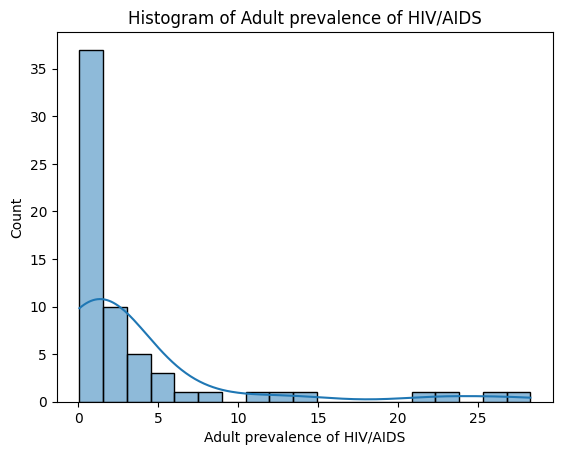

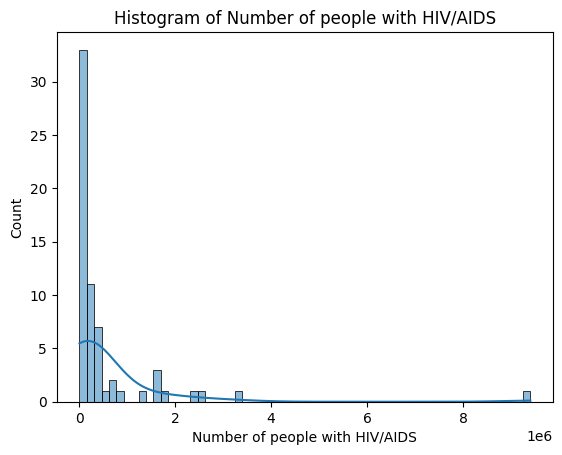

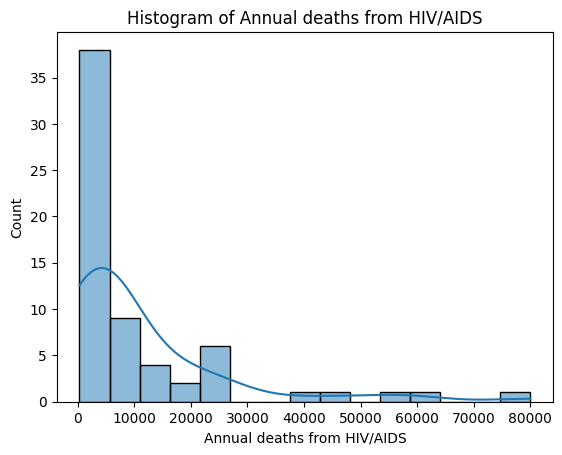

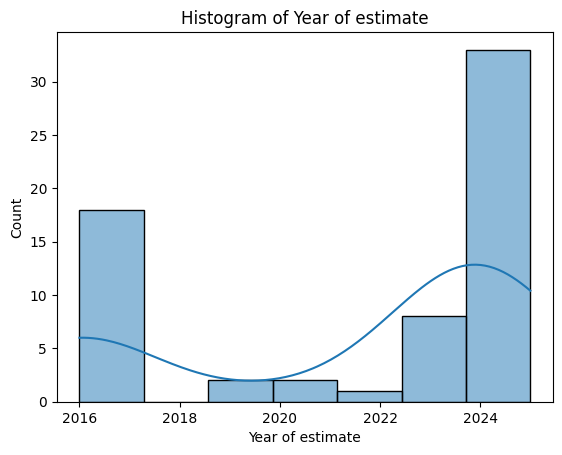

In [30]:
# Histogram for each numeric column
for col in numeric_cols + ['Year of estimate']:
    sns.histplot(data=HA, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


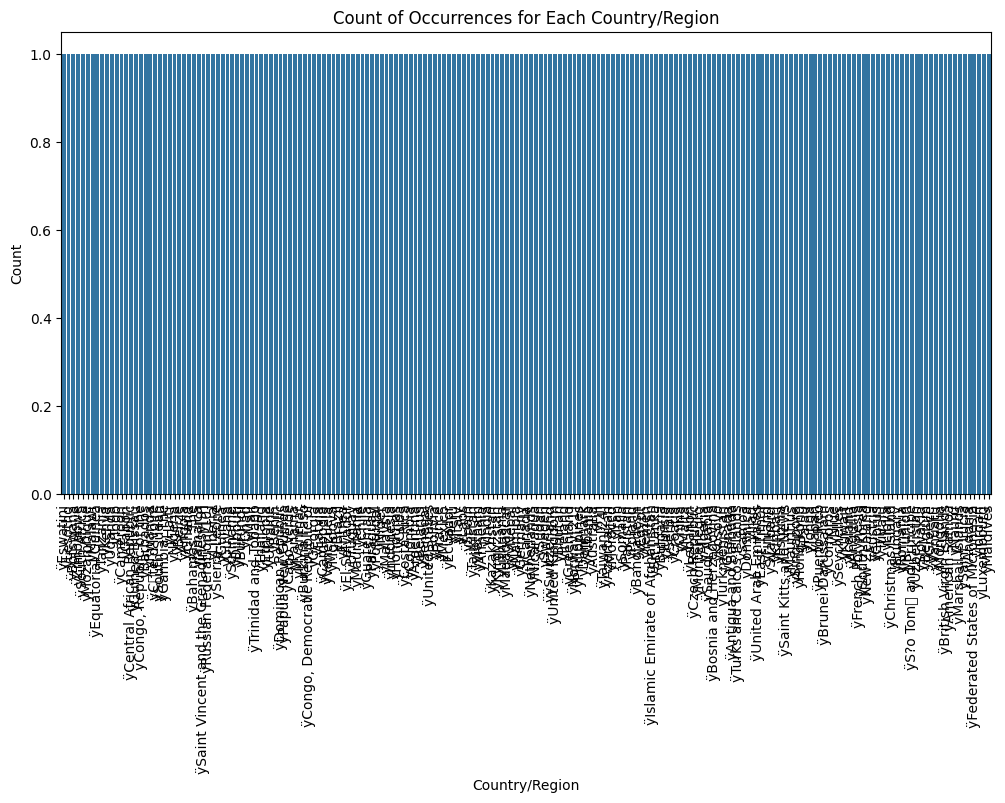

In [18]:
# Count plot for the "Country/Region" column
plt.figure(figsize=(12, 6))
sns.countplot(x='Country/Region', data=HA)
plt.title('Count of Occurrences for Each Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [31]:
# Prepare numeric dataframe for correlation analysis
numeric_HA = HA.select_dtypes(include=['number'])

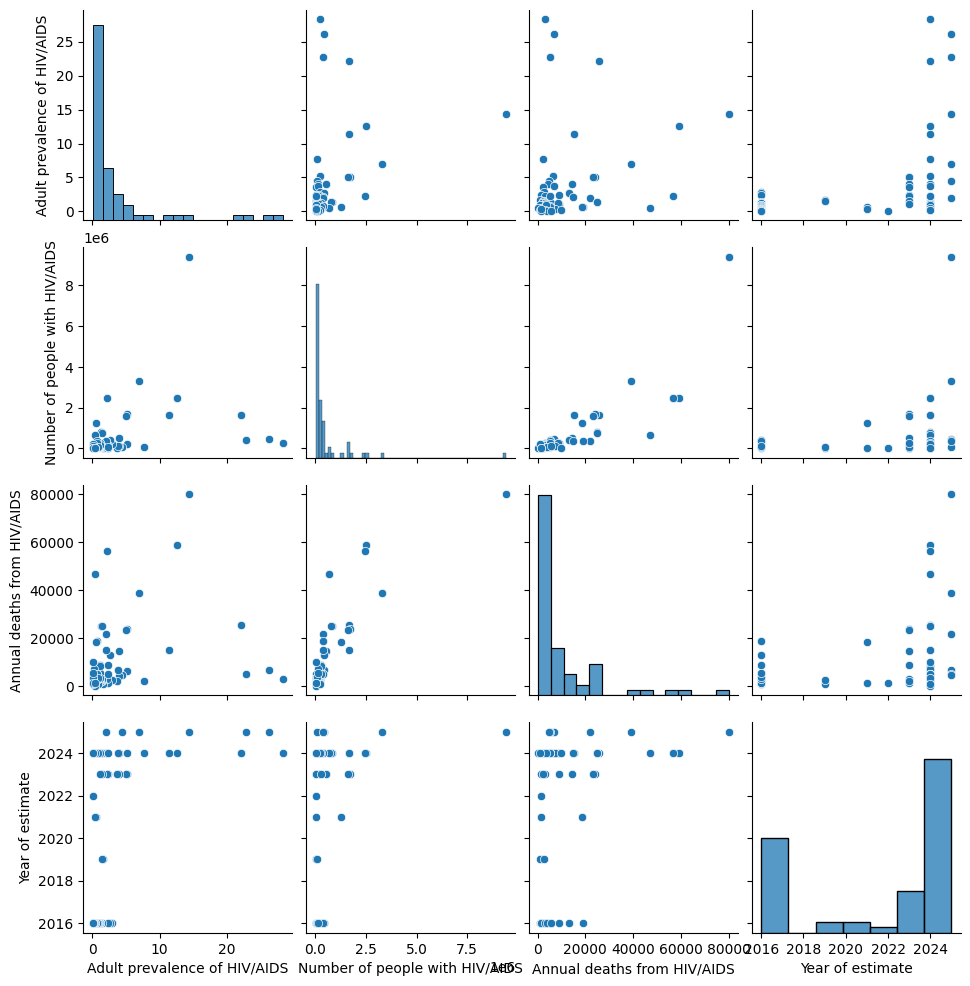

In [32]:
# Pair plot to visualize pairwise relationships
sns.pairplot(HA[numeric_cols + ['Year of estimate']])
plt.show()

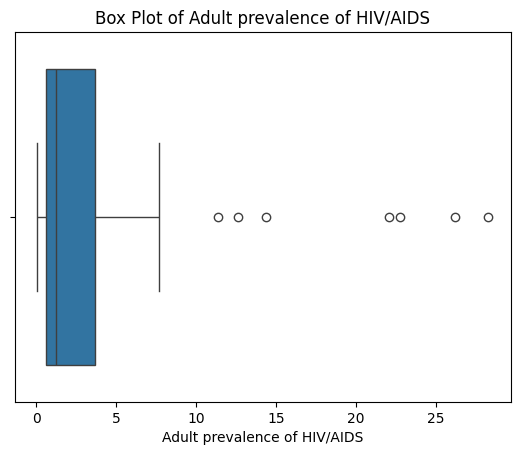

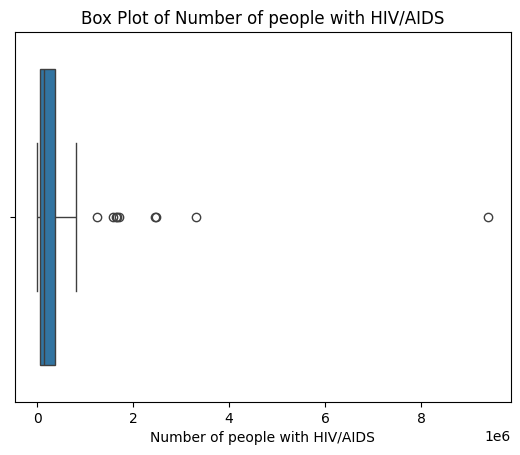

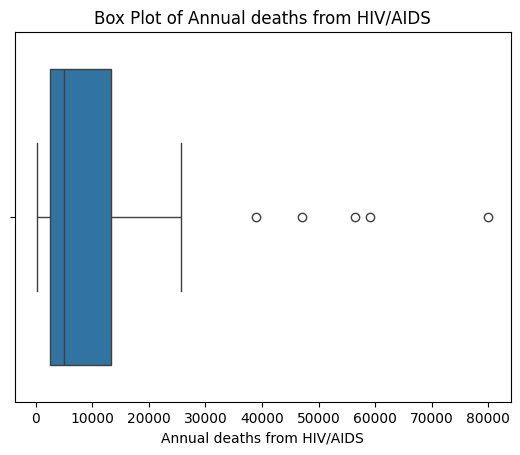

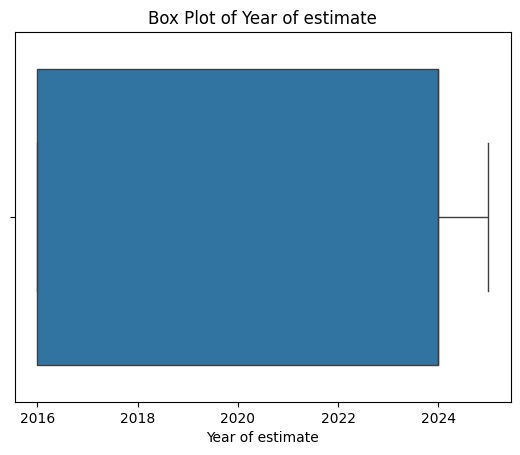

In [33]:
# Box plot for numeric features to inspect outliers
for col in numeric_cols + ['Year of estimate']:
    sns.boxplot(x=HA[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

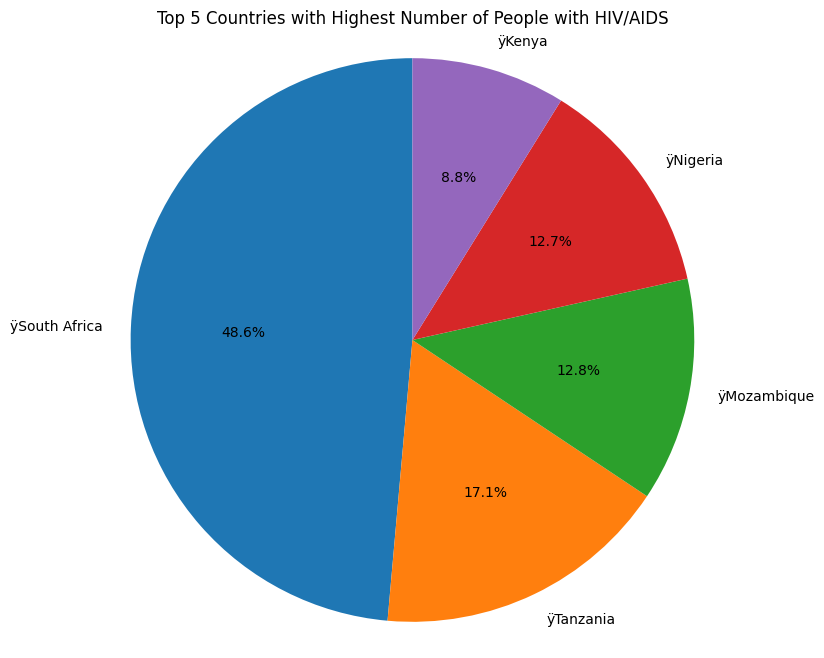

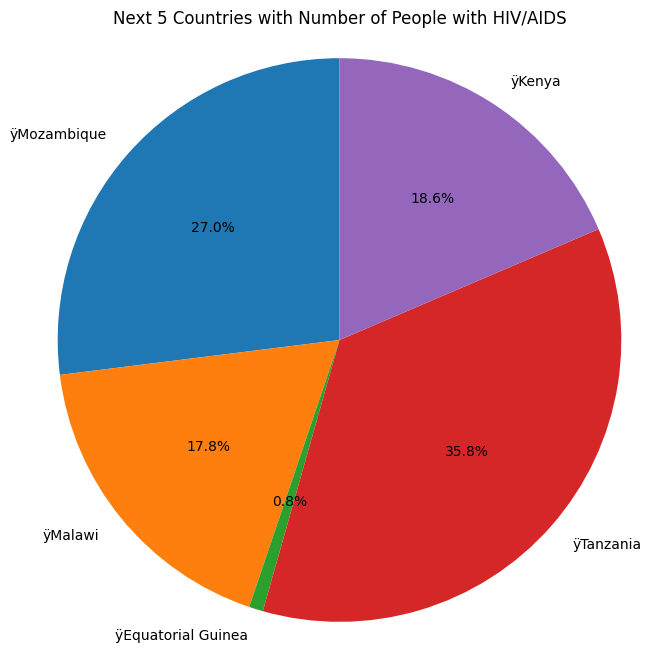

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_countries['Number of people with HIV/AIDS'], labels=top_5_countries['Country/Region'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries with Highest Number of People with HIV/AIDS')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

next_5_countries = HA.iloc[5:10]

plt.figure(figsize=(8, 8))
plt.pie(next_5_countries['Number of people with HIV/AIDS'], labels=next_5_countries['Country/Region'], autopct='%1.1f%%', startangle=90)
plt.title('Next 5 Countries with Number of People with HIV/AIDS')
plt.axis('equal')
plt.show()
